In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
clg_scores = pd.read_csv(r'C:\Users\neera\Desktop\College Scorecard Variables.csv')

clg_scores.head()

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,REGION,CONTROL,ACCREDAGENCY,PREDDEG,...,PPTUG_EF,NPT4_PUB,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654,100200,Alabama A & M University,Normal,AL,35762,5,1,Southern Association of Colleges and Schools C...,3,...,0.0587,14444.0,NaN,5384.0,7101.0,0.2685,0.8987,0.429326288,0.5113182423,31000
1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,1,Southern Association of Colleges and Schools C...,3,...,0.2425,17005.0,NaN,16454.0,10717.0,0.5829,0.6009,0.6182700794,0.6733300829,41200
2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,5,2,Southern Association of Colleges and Schools C...,3,...,0.5014,NaN,15322.0,4206.0,4292.0,0.4000,0.0035,0.4390243902,0.5507246377,39600
3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,5,1,Southern Association of Colleges and Schools C...,3,...,0.1443,20909.0,NaN,9242.0,9442.0,0.5187,0.6176,0.680887372,0.742248062,46700
4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,5,1,Southern Association of Colleges and Schools C...,3,...,0.0666,13043.0,NaN,8527.0,7754.0,0.3001,0.8650,0.3660377358,0.4423076923,27700


In [3]:
clg_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            6806 non-null   int64  
 1   OPEID             6806 non-null   int64  
 2   INSTNM            6806 non-null   object 
 3   CITY              6806 non-null   object 
 4   STABBR            6806 non-null   object 
 5   ZIP               6806 non-null   object 
 6   REGION            6806 non-null   int64  
 7   CONTROL           6806 non-null   int64  
 8   ACCREDAGENCY      6551 non-null   object 
 9   PREDDEG           6806 non-null   int64  
 10  HIGHDEG           6806 non-null   int64  
 11  LOCALE            6331 non-null   float64
 12  CCSIZSET          6331 non-null   float64
 13  HBCU              6323 non-null   float64
 14  ADM_RATE          2006 non-null   float64
 15  SATVRMID          1239 non-null   float64
 16  SATMTMID          1242 non-null   float64


As mentioned, we are only interested in predominantly bachelor's-degree granting institutions, I'll filter the data to have only those institutions, ut before that I want to see how many records for each of degree granting institutions we have

In [4]:
clg_scores['PREDDEG'].value_counts()

1    2829
3    2058
2    1145
0     477
4     297
Name: PREDDEG, dtype: int64

From the above data we can observe that we have 2058 bachelor's-degree granting institutions(those with the value 3). Now we'll filter the data to have only these.

In [5]:
bach_clgs = clg_scores[clg_scores['PREDDEG'] ==3]

bach_clgs.head()

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,REGION,CONTROL,ACCREDAGENCY,PREDDEG,...,PPTUG_EF,NPT4_PUB,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654,100200,Alabama A & M University,Normal,AL,35762,5,1,Southern Association of Colleges and Schools C...,3,...,0.0587,14444.0,NaN,5384.0,7101.0,0.2685,0.8987,0.429326288,0.5113182423,31000
1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,1,Southern Association of Colleges and Schools C...,3,...,0.2425,17005.0,NaN,16454.0,10717.0,0.5829,0.6009,0.6182700794,0.6733300829,41200
2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,5,2,Southern Association of Colleges and Schools C...,3,...,0.5014,NaN,15322.0,4206.0,4292.0,0.4000,0.0035,0.4390243902,0.5507246377,39600
3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,5,1,Southern Association of Colleges and Schools C...,3,...,0.1443,20909.0,NaN,9242.0,9442.0,0.5187,0.6176,0.680887372,0.742248062,46700
4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,5,1,Southern Association of Colleges and Schools C...,3,...,0.0666,13043.0,NaN,8527.0,7754.0,0.3001,0.8650,0.3660377358,0.4423076923,27700


In [6]:
bach_clgs.shape

(2058, 33)

### 1. What is the mean, median and standard deviation of the average SAT for each region?

In [7]:
sat_region = bach_clgs.groupby(by=['REGION'])

sat_region['SAT_AVG'].mean()

REGION
0    1321.200000
1    1204.309524
2    1158.155844
3    1139.188679
4    1144.379310
5    1122.444444
6    1111.938144
7    1158.281250
8    1174.094828
9    1034.333333
Name: SAT_AVG, dtype: float64

In [8]:
sat_region['SAT_AVG'].median()

REGION
0    1312.0
1    1156.0
2    1132.0
3    1124.0
4    1132.0
5    1116.0
6    1085.0
7    1149.0
8    1143.0
9    1009.0
Name: SAT_AVG, dtype: float64

In [9]:
sat_region['SAT_AVG'].std()

REGION
0     28.420063
1    163.080066
2    138.402193
3    110.045240
4     88.427314
5    116.530184
6    115.663558
7     90.443079
8    135.397449
9     63.885314
Name: SAT_AVG, dtype: float64

### 2. What are the ten most selective schools and the ten least selective schools based on admission rates?

First I like to see if there are any multiple records of same university

In [10]:
bach_clgs[bach_clgs['INSTNM'].duplicated(keep=False)].sort_values(by='INSTNM')

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,REGION,CONTROL,ACCREDAGENCY,PREDDEG,...,PPTUG_EF,NPT4_PUB,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
3773,241128,1194101,American University of Puerto Rico,Manati,PR,00674-1082,9,2,Middle States Commission on Higher Education,3,...,0.1452,NaN,9231.0,3044.0,2945.0,0.3401,0.6538,0.4932735426,0.5376884422,21700
3772,241100,1194100,American University of Puerto Rico,Bayamon,PR,00960-2037,9,2,Middle States Commission on Higher Education,3,...,0.1061,NaN,9656.0,3035.0,2995.0,0.2595,0.7952,0.4932735426,0.5376884422,21700
1034,150066,178500,Anderson University,Anderson,IN,46012-3495,3,2,Higher Learning Commission,3,...,0.0445,NaN,23209.0,9704.0,6318.0,0.6039,0.9083,0.7640264026,0.7806215722,37200
3089,217633,341800,Anderson University,Anderson,SC,29621-4035,5,2,Southern Association of Colleges and Schools C...,3,...,0.0596,NaN,21562.0,6448.0,6568.0,0.5887,0.8147,0.6673346693,0.7401392111,35200
1180,154721,190400,Bethany College,Lindsborg,KS,67456-1897,4,2,Higher Learning Commission,3,...,0.0038,NaN,29482.0,5163.0,4285.0,0.2901,0.7951,0.8405797101,0.8235294118,40200
3656,237181,380800,Bethany College,Bethany,WV,26032,5,2,Higher Learning Commission,3,...,0.0036,NaN,19268.0,9259.0,5983.0,0.3396,0.9674,0.7471264368,0.8526785714,40400
1036,150145,178700,Bethel University,Mishawaka,IN,46545-5591,3,2,Higher Learning Commission,3,...,0.1479,NaN,19496.0,7725.0,5711.0,0.7080,0.7057,0.5555555556,PrivacySuppressed,37800
3182,219718,348000,Bethel University,McKenzie,TN,38201,5,2,Southern Association of Colleges and Schools C...,3,...,0.1194,NaN,15776.0,7225.0,3256.0,0.2878,0.5319,0.5416666667,0.595505618,38600
1675,173160,905800,Bethel University,Saint Paul,MN,55112,4,2,Higher Learning Commission,3,...,0.1513,NaN,25604.0,9481.0,7705.0,0.7662,0.7865,0.886618999,0.9016949153,47300
3105,217934,343000,Columbia College,Columbia,SC,29203,5,2,Southern Association of Colleges and Schools C...,3,...,0.3399,NaN,16034.0,7004.0,6036.0,0.5294,0.4692,0.5555555556,0.6569767442,34600


From the above we result we can observe that there are multiple universities, but lets compare the UNITID of the institutions to confirm if they are same or not

In [11]:
bach_clgs[bach_clgs[['UNITID','INSTNM']].duplicated()].shape[0]

0

From the above result we can observe that those institutions are not duplicates and now we'll try to find the most and least institutions with admission rates

In [12]:
#adm_rate_not_na = bach_clgs.loc[bach_clgs['ADM_RATE'].notna(),['INSTNM', 'ADM_RATE']]
adm_rate_clgs = bach_clgs.loc[:,['INSTNM', 'ADM_RATE']]

adm_rate_clgs.head()

,INSTNM,ADM_RATE
0,Alabama A & M University,0.8986
1,University of Alabama at Birmingham,0.9211
2,Amridge University,NaN
3,University of Alabama in Huntsville,0.8087
4,Alabama State University,0.9774


In [13]:
adm_rate_clgs['LOW_ADM_RATE'] = adm_rate_clgs['ADM_RATE'].rank(ascending = True, method = 'dense')
adm_rate_clgs['HIGH_ADM_RATE'] = adm_rate_clgs['ADM_RATE'].rank(ascending = False, method = 'dense')

Ten least selective schools based on admission rates are as below (I've given same rank to the schools with same admission rate, so the displayed number of institutions might be more than 10)

In [14]:
least_adm_rate = adm_rate_clgs[adm_rate_clgs['LOW_ADM_RATE'] <= 10].sort_values(by='ADM_RATE', ascending = True)

least_adm_rate[['INSTNM', 'ADM_RATE', 'LOW_ADM_RATE']]

,INSTNM,ADM_RATE,LOW_ADM_RATE
1015,Saint Anthony College of Nursing,0.0000,1.0
6147,Chamberlain University-California,0.0000,1.0
3841,Stanford University,0.0436,2.0
2866,Curtis Institute of Music,0.0455,3.0
1492,Harvard University,0.0473,4.0
2046,Princeton University,0.0548,5.0
2153,Columbia University in the City of New York,0.0591,6.0
605,Yale University,0.0635,7.0
203,California Institute of Technology,0.0662,8.0
1508,Massachusetts Institute of Technology,0.0674,9.0


Ten most selective schools based on admission rates are as below( same as above, I've used dense rank to display the top selective schools)

In [15]:
high_adm_rate = adm_rate_clgs[adm_rate_clgs['HIGH_ADM_RATE'] <= 10].sort_values(by='ADM_RATE', ascending = False)

high_adm_rate[['INSTNM', 'ADM_RATE', 'HIGH_ADM_RATE']]

,INSTNM,ADM_RATE,HIGH_ADM_RATE
231,California Christian College,1.0000,1.0
5659,West Coast University-Dallas,1.0000,1.0
3485,Goddard College,1.0000,1.0
4489,San Juan Bautista School of Medicine,1.0000,1.0
5001,Visible Music College,1.0000,1.0
5579,Whitworth University-Adult Degree Programs,1.0000,1.0
5600,Criswell College,1.0000,1.0
5626,Bais HaMedrash and Mesivta of Baltimore,1.0000,1.0
5631,Yeshiva Gedolah Zichron Leyma,1.0000,1.0
5688,Elizabethtown College School of Continuing and...,1.0000,1.0


### 3. Which of the variables in the dataset are most highly correlated with median income 10 years after graduating?

In [16]:
bach_clgs.dtypes

UNITID                int64
OPEID                 int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
REGION                int64
CONTROL               int64
ACCREDAGENCY         object
PREDDEG               int64
HIGHDEG               int64
LOCALE              float64
CCSIZSET            float64
HBCU                float64
ADM_RATE            float64
SATVRMID            float64
SATMTMID            float64
SATWRMID            float64
SAT_AVG             float64
ACTCMMID            float64
ACTENMID            float64
ACTMTMID            float64
ACTWRMID            float64
PPTUG_EF            float64
NPT4_PUB            float64
NPT4_PRIV           float64
INEXPFTE            float64
AVGFACSAL           float64
C150_4              float64
PFTFTUG1_EF         float64
COMPL_RPY_3YR_RT     object
COMPL_RPY_5YR_RT     object
MD_EARN_WNE_P10      object
dtype: object

Just want to make sure that every numerical column has numeric data type, but as the 3 columns which are supposed to be numeric data types are object data types. So to calculate the correlation for those fields it's necessary to change them to numeric data types.

In [17]:
bach_clgs['MD_EARN_WNE_P10'] = pd.to_numeric(bach_clgs['MD_EARN_WNE_P10'], errors='coerce')
bach_clgs['COMPL_RPY_3YR_RT'] = pd.to_numeric(bach_clgs['COMPL_RPY_3YR_RT'], errors='coerce')
bach_clgs['COMPL_RPY_5YR_RT'] = pd.to_numeric(bach_clgs['COMPL_RPY_5YR_RT'], errors='coerce')

bach_clgs.dtypes

<ipython-input-17-34038a40d957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bach_clgs['MD_EARN_WNE_P10'] = pd.to_numeric(bach_clgs['MD_EARN_WNE_P10'], errors='coerce')
<ipython-input-17-34038a40d957>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bach_clgs['COMPL_RPY_3YR_RT'] = pd.to_numeric(bach_clgs['COMPL_RPY_3YR_RT'], errors='coerce')
<ipython-input-17-34038a40d957>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

UNITID                int64
OPEID                 int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
REGION                int64
CONTROL               int64
ACCREDAGENCY         object
PREDDEG               int64
HIGHDEG               int64
LOCALE              float64
CCSIZSET            float64
HBCU                float64
ADM_RATE            float64
SATVRMID            float64
SATMTMID            float64
SATWRMID            float64
SAT_AVG             float64
ACTCMMID            float64
ACTENMID            float64
ACTMTMID            float64
ACTWRMID            float64
PPTUG_EF            float64
NPT4_PUB            float64
NPT4_PRIV           float64
INEXPFTE            float64
AVGFACSAL           float64
C150_4              float64
PFTFTUG1_EF         float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
MD_EARN_WNE_P10     float64
dtype: object

In [18]:
corr = bach_clgs.corr()

corr

,UNITID,OPEID,REGION,CONTROL,PREDDEG,HIGHDEG,LOCALE,CCSIZSET,HBCU,ADM_RATE,...,PPTUG_EF,NPT4_PUB,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
UNITID,1.000000,0.335665,0.110249,0.321522,NaN,-0.171454,-0.086629,-0.427252,-0.084174,0.091212,...,0.283685,-0.076697,-0.199103,-0.129020,-0.235338,-0.289364,-0.329295,-0.220308,-0.192756,-0.031913
OPEID,0.335665,1.000000,0.087944,0.240882,NaN,-0.031844,-0.058103,-0.195337,-0.038333,0.083157,...,-0.023746,-0.158713,-0.148370,-0.081496,-0.262479,-0.206559,-0.193854,-0.209733,-0.181887,-0.005260
REGION,0.110249,0.087944,1.000000,0.035560,NaN,0.036418,-0.081501,-0.063471,0.043326,0.015297,...,0.120779,-0.321494,-0.124915,-0.080798,-0.120423,-0.184861,-0.183530,-0.194132,-0.230910,-0.182108
CONTROL,0.321522,0.240882,0.035560,1.000000,NaN,-0.175975,-0.118062,-0.470277,-0.094633,-0.095363,...,0.116956,NaN,0.040987,-0.101245,-0.285675,-0.110279,-0.202668,-0.213679,-0.163483,-0.031413
PREDDEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HIGHDEG,-0.171454,-0.031844,0.036418,-0.175975,NaN,1.000000,-0.114142,0.363673,-0.055656,0.097381,...,0.085778,0.128753,0.137603,0.006180,0.228142,0.087383,-0.091639,0.030591,0.052139,0.131939
LOCALE,-0.086629,-0.058103,-0.081501,-0.118062,NaN,-0.114142,1.000000,-0.051688,-0.017698,0.048270,...,-0.088001,0.065876,-0.122643,-0.096727,-0.169251,-0.041549,0.130754,0.082958,0.097665,-0.185493
CCSIZSET,-0.427252,-0.195337,-0.063471,-0.470277,NaN,0.363673,-0.051688,1.000000,0.023487,-0.077361,...,-0.262780,0.216417,0.323310,0.171447,0.554613,0.410055,0.302436,0.335121,0.321693,0.312067
HBCU,-0.084174,-0.038333,0.043326,-0.094633,NaN,-0.055656,-0.017698,0.023487,1.000000,-0.048651,...,-0.074124,-0.062721,-0.053215,-0.054754,-0.089918,-0.189592,0.080576,-0.392760,-0.433884,-0.215615
ADM_RATE,0.091212,0.083157,0.015297,-0.095363,NaN,0.097381,0.048270,-0.077361,-0.048651,1.000000,...,0.105487,0.124977,-0.122383,-0.408040,-0.331744,-0.340418,-0.166546,-0.101325,-0.051127,-0.283797


<AxesSubplot:>

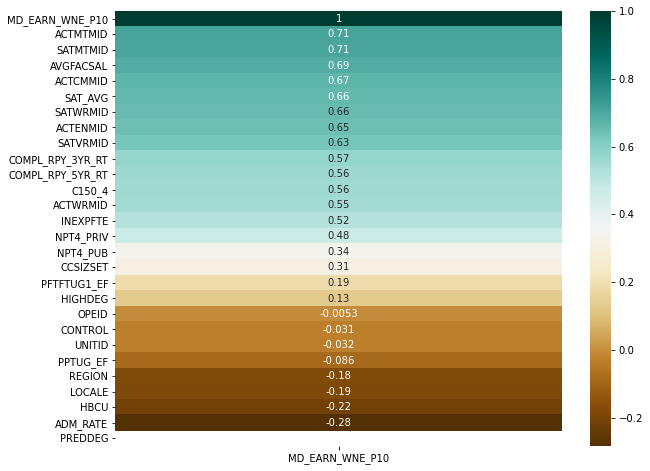

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(corr[['MD_EARN_WNE_P10']].sort_values(by='MD_EARN_WNE_P10', ascending = False), annot = True, cmap='BrBG')

From the above plot, we can observe that median income after 10 years of graduation is highly correlated with 2 features which are midpoints of ACT and SAT scores. This means that most of the students with higher SAT and ACT scores are able to earn higher salaries.

### 4. Describe, if any, the relationship between a school’s five year repayment rate versus a school’s completion rate for first time full time students?

In [20]:
bach_clgs.loc[:, ('COMPL_RPY_5YR_RT', 'C150_4')]

,COMPL_RPY_5YR_RT,C150_4
0,0.511318,0.2685
1,0.673330,0.5829
2,0.550725,0.4000
3,0.742248,0.5187
4,0.442308,0.3001
...,...,...
6299,NaN,0.1778
6314,NaN,NaN
6318,NaN,NaN
6319,NaN,0.1890


In [21]:
bach_clgs.dtypes

UNITID                int64
OPEID                 int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
REGION                int64
CONTROL               int64
ACCREDAGENCY         object
PREDDEG               int64
HIGHDEG               int64
LOCALE              float64
CCSIZSET            float64
HBCU                float64
ADM_RATE            float64
SATVRMID            float64
SATMTMID            float64
SATWRMID            float64
SAT_AVG             float64
ACTCMMID            float64
ACTENMID            float64
ACTMTMID            float64
ACTWRMID            float64
PPTUG_EF            float64
NPT4_PUB            float64
NPT4_PRIV           float64
INEXPFTE            float64
AVGFACSAL           float64
C150_4              float64
PFTFTUG1_EF         float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
MD_EARN_WNE_P10     float64
dtype: object

In [22]:
bach_clgs['COMPL_RPY_5YR_RT'] = pd.to_numeric(bach_clgs['COMPL_RPY_5YR_RT'], errors = 'coerce')

bach_clgs.loc[:, ('C150_4', 'COMPL_RPY_5YR_RT')].dtypes

<ipython-input-22-9f12c48d6094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bach_clgs['COMPL_RPY_5YR_RT'] = pd.to_numeric(bach_clgs['COMPL_RPY_5YR_RT'], errors = 'coerce')


C150_4              float64
COMPL_RPY_5YR_RT    float64
dtype: object

<AxesSubplot:xlabel='C150_4', ylabel='COMPL_RPY_5YR_RT'>

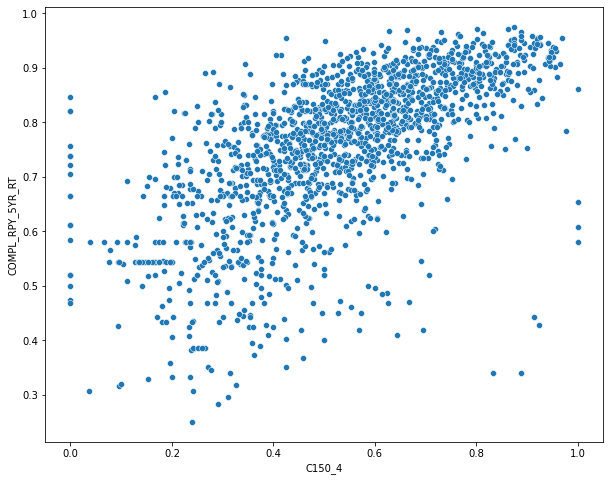

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bach_clgs, x='C150_4', y='COMPL_RPY_5YR_RT')

From the above plot we can deduce that little bit of positive linear realtionship in the sense that most students who has higher completion rate for first time full time students has higher five year repayment rate. 

Eventhough the data is little bit of spreaded with students who has lesser completion rate for first time full time students, most of the data points are clustered around the top of the plot whose five year repayment rate is higher than 0.6 and completition rate is 0.3 to 1.

In [24]:
bach_clgs.loc[:,('C150_4', 'COMPL_RPY_5YR_RT')].corr()

,C150_4,COMPL_RPY_5YR_RT
C150_4,1.000000,0.638132
COMPL_RPY_5YR_RT,0.638132,1.000000


We can observe that completion rate and 5 year repayment rate are positively correlated and has a correlation of 0.63.

### 5. Visualize the distribution of the average SAT per institution and each institution’s admission rates. How would you describe each distribution? How do they compare to one another 

In [25]:
bach_clgs.loc[:,('SAT_AVG', 'ADM_RATE')]

,SAT_AVG,ADM_RATE
0,957.0,0.8986
1,1220.0,0.9211
2,NaN,NaN
3,1314.0,0.8087
4,972.0,0.9774
...,...,...
6299,NaN,NaN
6314,NaN,NaN
6318,NaN,0.2500
6319,NaN,NaN


In [26]:
bach_clgs.loc[:,('SAT_AVG', 'ADM_RATE')].dtypes

SAT_AVG     float64
ADM_RATE    float64
dtype: object

In [27]:
bach_clgs['SAT_AVG'] = bach_clgs['SAT_AVG'].astype(float)

bach_clgs['SAT_AVG'].dtypes

<ipython-input-27-bd2b7fccb407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bach_clgs['SAT_AVG'] = bach_clgs['SAT_AVG'].astype(float)


dtype('float64')

In [28]:
bach_clgs.loc[:,('SAT_AVG', 'ADM_RATE')].describe()

,SAT_AVG,ADM_RATE
count,1258.000000,1669.000000
mean,1145.262321,0.667782
std,124.148471,0.211838
min,785.000000,0.000000
25%,1062.000000,0.548300
50%,1126.000000,0.692200
75%,1203.750000,0.826700
max,1566.000000,1.000000


<AxesSubplot:xlabel='ADM_RATE', ylabel='Count'>

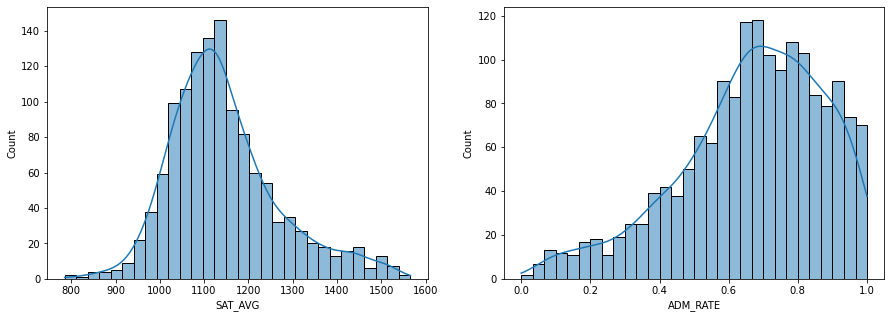

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.histplot(data=bach_clgs, x='SAT_AVG', bins=30, ax=ax[0], kde=True)
sns.histplot(data=bach_clgs, x='ADM_RATE', bins=30, ax=ax[1], kde=True)

From the above distributions we can observe that SAT average is little right skewed (most number of institutions SAT averages are accumulated to the left side of the data distribution meaning they are accepting students with lesser SAT scores) and admission rates data is left skewed (most number of institutions has admission rates are clustered to the right side meaning those institutions are accepting more number of students).

Let's compare those both variables against each other and see if there is any relationship between SAT averages and admission rates for each institutions.

<AxesSubplot:xlabel='SAT_AVG', ylabel='ADM_RATE'>

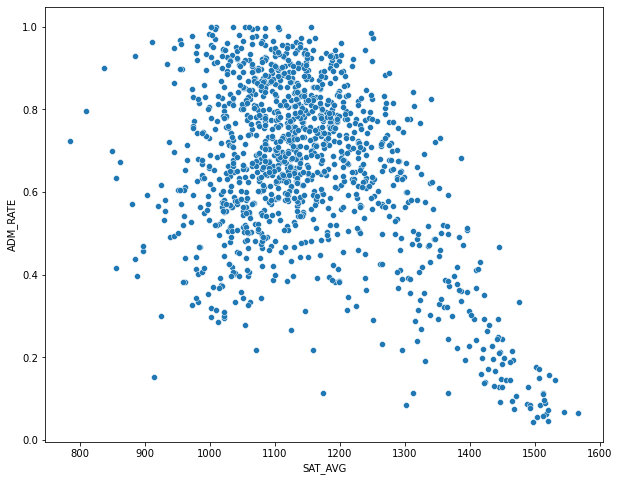

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bach_clgs, x = 'SAT_AVG', y = 'ADM_RATE')

From the above scatter plot, we can clearly see that SAT averages and admission rates are negatively correlated meaning the institutions with higher SAT averages have less admission rates. The cluster of data points on the top of the plot, we can clearly observe that most of the univerities are accepting SAT averages between 1000 to 1250 has admission rates around 0.6 to 1.